In [1]:
import pandas as pd
import seaborn as sns
from cmdstanpy import CmdStanModel
from matplotlib import pyplot as plt

# Load and plot

In [2]:
df = pd.read_csv("data/data-mix1.txt")
print(len(df))
df.head(5)

100


,Y
0,-0.84
1,-0.35
2,2.34
3,0.11
4,0.19


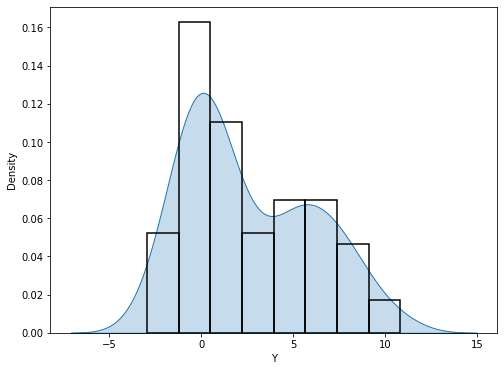

In [3]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
sns.histplot(ax=ax, x=df["Y"], stat="density", fill=False, color="k")
sns.kdeplot(ax=ax, x=df["Y"], fill=True, color="C0")
fig.show()

# Run Stan

In [4]:
model = CmdStanModel(stan_file="model/model11-5.stan")
print(model)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /workdir/chapter11/model/model11-5


CmdStanModel: name=model11-5
	 stan_file=/workdir/chapter11/model/model11-5.stan
	 exe_file=/workdir/chapter11/model/model11-5
	 compiler_optons=stanc_options=None, cpp_options=None


In [5]:
# without initial value, it sometimes fail to converge
fit = model.sample(
    data={
        "N": len(df),
        "Y": df["Y"].values
    },
    inits={
        "mu": [0.0, 6.0]
    }
)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 2


In [6]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-248.37400,0.043625,1.738970,-251.687000,-248.013000,-246.258000,1588.97,1355.780,1.00038
a,0.54127,0.002364,0.079101,0.395743,0.548139,0.656303,1119.86,955.509,1.00304
mu[1],-0.05000,0.004800,0.230000,-0.430000,-0.048000,0.330000,2389.00,2038.000,1.00000
mu[2],5.70000,0.021000,0.680000,4.400000,5.800000,6.700000,1099.00,938.000,1.00000
sigma[1],1.30000,0.004800,0.190000,1.000000,1.300000,1.600000,1588.00,1355.000,1.00000
sigma[2],2.50000,0.014000,0.490000,1.800000,2.400000,3.400000,1187.00,1013.000,1.00000
